# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

Another reference from Springboard: http://luisartola.com/software/2010/easy-xml-in-python/

In [1]:
from xml.etree import ElementTree as ET

from xml.etree.ElementTree import Element
from xml.etree.ElementTree import SubElement

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [6]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [8]:
document_tree.getiterator()

[<Element 'mondial' at 0x10436d3b8>,
 <Element 'country' at 0x1043b9638>,
 <Element 'name' at 0x1043b9688>,
 <Element 'population' at 0x1043b96d8>,
 <Element 'population' at 0x1043b9728>,
 <Element 'population' at 0x1043b9778>,
 <Element 'population' at 0x1043b97c8>,
 <Element 'population' at 0x1043b9818>,
 <Element 'population' at 0x1043b9868>,
 <Element 'population' at 0x1043b98b8>,
 <Element 'population' at 0x1043b9908>,
 <Element 'population' at 0x1043b9958>,
 <Element 'population_growth' at 0x1043b99a8>,
 <Element 'infant_mortality' at 0x1043b99f8>,
 <Element 'gdp_total' at 0x1043b9a48>,
 <Element 'gdp_agri' at 0x1043b9a98>,
 <Element 'gdp_ind' at 0x1043b9ae8>,
 <Element 'gdp_serv' at 0x1043b9b38>,
 <Element 'inflation' at 0x1043b9b88>,
 <Element 'unemployment' at 0x1043b9bd8>,
 <Element 'indep_date' at 0x1043b9c28>,
 <Element 'government' at 0x1043b9c78>,
 <Element 'encompassed' at 0x1043b9cc8>,
 <Element 'ethnicgroup' at 0x1043b9d18>,
 <Element 'ethnicgroup' at 0x1043b9d68>,
 <E

In [41]:
for element in document_tree.iterfind('country'):
    country_name = element.find('name').text
#    for element1 in element.getiterator('province'):
#        province = element1.text
#    city = element1.find('city').text
    for element2 in element.iterfind('city'):
        city = safetext( element2[0] )
        print (country_name)
        print (city)

Albania
Tirana
Albania
Shkodër
Albania
Durrës
Albania
Vlorë
Albania
Elbasan
Albania
Korçë
Macedonia
Skopje
Macedonia
Kumanovo
Serbia
Beograd
Serbia
Novi Sad
Serbia
Niš
Montenegro
Podgorica
Kosovo
Prishtine
Andorra
Andorra la Vella


In [42]:
for elem in document.iter('city'):
    print (elem.find('name').text)

Tirana
Shkodër
Durrës
Vlorë
Elbasan
Korçë
Komotini
Kavala
Athina
Peiraias
Peristeri
Acharnes
Patra
Kozani
Kerkyra
Ioannina
Thessaloniki
Iraklio
Chania
Ermoupoli
Rhodes
Tripoli
Lamia
Chalkida
Larissa
Volos
Mytilini
Karyes
Skopje
Kumanovo
Beograd
Novi Sad
Niš
Podgorica
Prishtine
Andorra la Vella
Strasbourg
Mulhouse
Bordeaux
Clermont-Ferrand
Caen
Rennes
Brest
Dijon
Orléans
Tours
Reims
Chalons en Champagne
Ajaccio
Besançon
Rouen
Le Havre
Paris
Boulogne-Billancourt
Argenteuil
Montreuil
Saint-Paul
Montpellier
Nîmes
Perpignan
Limoges
Metz
Nancy
Toulouse
Lille
Nantes
Angers
Le Mans
Amiens
Poitiers
Marseille
Nice
Toulon
Aix-en-Provence
Lyon
Grenoble
Saint-Étienne
Villeurbanne
Sevilla
Almería
Cádiz
Córdoba
Granada
Huelva
Málaga
Jerez de la Frontera
Jaén
Algeciras
Marbella
Dos Hermanas
Zaragoza
Oviedo
Gijón
Palma de Mallorca
Vitoria-Gasteiz
Bilbao
Barakaldo
Donostia
Santa Cruz de Tenerife
San Cristóbal de La Laguna
Las Palmas de Gran Canaria
Telde
Santander
Valladolid
Burgos
León
Salamanca
Toledo

In [8]:
document_tree.getroot()

<Element 'mondial' at 0x11269a188>

In [11]:
##Oh, great. Her copy doesn't work. I'll have to fix it. Oh, it's just print(). Nvm!

#print names of all countries
for child in document_tree.getroot():
    print (child.find('name').text)

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [15]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print ( '* ' + element.find('name').text + ':' ),
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print ( capitals_string[:-2] )

* Albania:
Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece:
Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia:
Skopje, Kumanovo
* Serbia:
Beograd, Novi Sad, Niš
* Montenegro:
Podgorica
* Kosovo:
Prishtine
* Andorra:
Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [5]:
document = ET.parse( './data/mondial_database.xml' )
doc_root = document.getroot()

In [34]:
#Trying out things
print0 = doc_root[1].tag
print1 = doc_root[1].attrib

print2 = doc_root[1][0].tag
print3 = doc_root[1][0].text

print4 = doc_root[1][1].tag
print5 = doc_root[1][1].text

print6 = doc_root[1][2].tag
print7 = doc_root[1][2].text

print8 = doc_root[1]


prints = [print0, print1, print2, print3, print4, print5, print6, print7, print8]

counter = 0
for item in prints:
    prints[counter] = str(item)
    counter += 1

print("\n".join(prints))

#Ελληνική Δημοκρατία = Greek Republic (in Greek) = Elliniki Dimocratia


country
{'area': '131940', 'memberships': 'org-AG org-BIS org-BSEC org-CD org-SELEC org-CE org-EMU org-EAPC org-EBRD org-ECB org-EIB org-CERN org-ESA org-EU org-FATF org-FAO org-IGAD org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICJ org-ICCt org-Interpol org-IDA org-IEA org-IFRCS org-IFC org-IFAD org-IHO org-ILO org-IMO org-IMSO org-IMF org-IOC org-IOM org-OIF org-ITSO org-ITU org-ITUC org-MIGA org-NATO org-NEA org-NSG org-OECD org-OSCE org-OPCW org-OAS org-PCA org-UN org-UNCTAD org-UNESCO org-UNHCR org-UNIDO org-UNIFIL org-UPU org-WCO org-WFTU org-WHO org-WIPO org-WMO org-UNWTO org-WTO org-ZC', 'car_code': 'GR', 'capital': 'cty-Greece-Athens'}
name
Greece
localname
Ελληνική Δημοκρατία
population
1096810
<Element 'country' at 0x11163b9a8>


In [ ]:
#scrap
find_this = 'infant_mortality'
    for subelement in element.getiterator(find_this)

## Quesiton 1

*Top 10 countries with the lowest infant mortality rates*

In [13]:
# # print names of all countries and their cities
# for element in document_tree.iterfind('country'):
#     print ( '* ' + element.find('name').text + ':' ),
#     capitals_string = ''
#     for subelement in element.getiterator('city'):
#         capitals_string += subelement.find('name').text + ', '
#     print ( capitals_string[:-2] )
    
#So, what I want to do instead is make a pandas DF with country name repeated for each subitem
#and the element I want is infant_mortality on the tree 'document' or 'doc_root'
##Ran into a couple problems when country_inf_mort was NoneType, see below.

country_names = []
country_morts = []

for element in document.iterfind('country'):
    country_name = element.find('name')
    country_inf_mort = element.find('infant_mortality')
    country_names.append(country_name.text)
    if country_inf_mort is not None:
        country_mort = country_inf_mort.text
    else:
        country_mort = np.NaN
    country_morts.append(country_mort)
#Okay, so I think this has a problem where something produces a generator rather than the concrete
#numbers, but I'm having some trouble working it out. I may just want to try a different approach
#to the problem for a bit, see if I can pick up understanding again.
print (len(country_names))
print (len(country_morts))
#....now I don't seem to have the problem. Um... good?
###OH! The problem is that some of these are stings, which is bad. I need to convert everything to floats.
    
Frame_Mort= pd.DataFrame.from_items([('country', country_names), ('infant_mortality', country_morts)])

    
#One Idea...
#pd.concat(zipped_series, keys=[countries]) 
#No... this won't work as wanted (will make a longer series). Do from_items.

244
244


In [16]:
Frame_Mort.head()

,country,infant_mortality
213,Central African Republic,92.86
230,Guinea-Bissau,90.92
214,Chad,90.3
174,Argentina,9.96
72,Thailand,9.86


In [22]:
#Convert all infant_mortality values to floats so that they sort correctly.
Frame_Mort["infant_mortality"] = Frame_Mort["infant_mortality"].astype(float)

In [25]:
dtype(Frame_Mort["infant_mortality"])

dtype('float64')

In [26]:
Frame_Mort = Frame_Mort.sort_values(by='infant_mortality', ascending=False)

# Answer to Question 1

In [28]:
Frame_Mort[0:10]

,country,infant_mortality
194,Western Sahara,145.82
54,Afghanistan,117.23
189,Mali,104.34
226,Somalia,100.14
213,Central African Republic,92.86
230,Guinea-Bissau,90.92
214,Chad,90.30
192,Niger,86.27
195,Angola,79.99
201,Burkina Faso,76.80


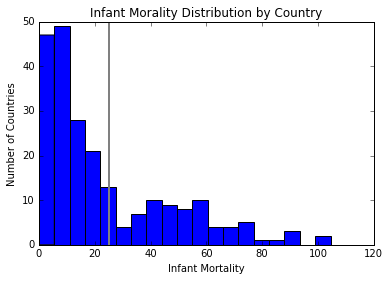

In [61]:
#A histogram for histogram's sake
plt.hist(Frame_Mort['infant_mortality'], bins=20, range = [0,110])
plt.axvline(Frame_Mort['infant_mortality'].mean(), linewidth=2, color='gray')
plt.title('Infant Morality Distribution by Country')
plt.xlabel('Infant Mortality')
plt.ylabel('Number of Countries')
plt.show()

## Scratchwork for Q1

In [5]:
#Little bit of scrachwork
#type(Frame_Mort['infant_mortality'].head())
#Frame_Mort['country'].head()

0       Albania
1        Greece
2     Macedonia
3        Serbia
4    Montenegro
Name: country, dtype: object

In [55]:
Frame_Mort[0:10]
#Oh darn, I have to invalidate this. It seems to be a generator, not a true dataframe.
##Problem actually ended up being that some infant_mortality values were strings. I needed to convert all to floats.

,country,infant_mortality
213,Central African Republic,92.86
230,Guinea-Bissau,90.92
214,Chad,90.3
174,Argentina,9.96
72,Thailand,9.86
64,Bahrain,9.68
131,Greenland,9.42
204,Botswana,9.38
138,Sint Maarten,9.05
107,Sri Lanka,9.02


In [17]:
Frame_Mort[0:11]

,country,infant_mortality
213,Central African Republic,92.86
230,Guinea-Bissau,90.92
214,Chad,90.3
174,Argentina,9.96
72,Thailand,9.86
64,Bahrain,9.68
131,Greenland,9.42
204,Botswana,9.38
138,Sint Maarten,9.05
107,Sri Lanka,9.02


In [19]:
dtype(Frame_Mort["infant_mortality"])

dtype('O')

In [14]:
type(Frame_Mort)

pandas.core.frame.DataFrame

In [6]:
len(Frame_Mort)
#Frame_Mort['infant_mortality'][0:10]

244

In [15]:
len(country_names)

244

In [51]:
#For testing to fix problem when country_inf_mort was NoneType (gave error if .text was called)
for element in document.iterfind('country'):
    country_name = element.find('name')
    print (country_name.text)
    country_inf_mort = element.find('infant_mortality')
    if country_inf_mort is not None:
        print(country_inf_mort.text)
    else:
        print ( str(np.NaN) )


## Quesiton 2

*Top 10 cities with the largest population*

In [16]:
def safetext(writing):
    #element.text, except with None->NaN
    if writing is not None:
        output = writing.text
    else:
        output = np.NaN
    return output

In [ ]:
#Nestling illustration
#Country (0 = "name")
    #province (0 = "name")
        #city (0 = "name")
            #population: anywhere from no instance to multiple instances.
                #year is an attribute
                #number is just the result of... .text?
            ##Probably resembles the format of country population, wherein year should also be retained.

In [ ]:
country_names = []
country_cities = []
cities_pops = []

for element in document.iterfind('country'):
    country_name = safetext ( element.find('name') )
    for element2 in element.getiterator('city'):
        city = safetext ( element2.find('name') )
        for element3 in element2.getiterator('city'):
            for element4 in element3.getiterator('population'):
                pops = safetext( element4 )
                year = element4.attrib['year']
                print (country_name)
                print (city)
                print (pops)
                print (year)
#Yes! This works! (note that year was an attribute, which outputs as dictionaries)

In [96]:
country_names = []
country_cities = []
populations = []
pop_years = []

for element in document.iterfind('country'):
    country_name = safetext ( element.find('name') )
    for element2 in element.getiterator('city'):
        city = safetext ( element2.find('name') )
        for element3 in element2.getiterator('city'):
            for element4 in element3.getiterator('population'):
                pops = safetext( element4 )
                year = element4.attrib['year']
                country_names.append(str(country_name))
                country_cities.append(str(city))
                populations.append(float(pops))
                pop_years.append(int(year))

#This works... (note that year was an attribute, which outputs as dictionaries)

In [97]:
ser_names = pd.Series(country_names, dtype = 'O')
ser_cities  =  pd.Series(country_cities, dtype = 'O')
ser_pops = pd.Series(populations, dtype = 'float64')
ser_years = pd.Series(pop_years, dtype = 'u8')

In [100]:
citypops = pd.DataFrame.from_items([('country', ser_names), ('city', ser_cities), ('pop_year', ser_years),\
                                    ('population', ser_pops)])

In [101]:
citypops.head()

,country,city,pop_year,population
0,Albania,Tirana,1987,192000
1,Albania,Tirana,1990,244153
2,Albania,Tirana,2011,418495
3,Albania,Shkodër,1987,62000
4,Albania,Shkodër,2011,77075


In [110]:
citypops['pop_year'].unique()

array([1987, 1990, 2011, 1981, 1991, 2001, 2014, 2002, 2003, 1999, 2006,
       1994, 2010, 2013, 1992, 2000, 2012, 2009, 2005, 1989, 1970, 1986,
       1979, 1995, 2004, 2007, 2008, 1997, 1960, 1996, 1998, 1972, 1993,
       1983, 1971, 1957, 1980, 1950, 1982, 1973, 1984, 1988, 1976, 1985,
       1959, 1969])

# Answer 2

In [135]:
recent_pops = citypops.loc[citypops['pop_year'] >= 2009]
popgroups = recent_pops.groupby(['city', 'country'])
grouped_pop_max = popgroups['population'].max()
sort_pops = grouped_pop_max.sort_values( ascending=False)
sort_pops[0:10]


city       country
Shanghai   China      22315474
Istanbul   Turkey     13710512
Mumbai     India      12442373
Moskva     Russia     11979529
Beijing    China      11716620
São Paulo  Brazil     11152344
Tianjin    China      11090314
Guangzhou  China      11071424
Delhi      India      11034555
Shenzhen   China      10358381
Name: population, dtype: float64

## Scratchwork for problem 2

In [ ]:
def recent_results(df, grouping, maxcolumn):
    dfgroups = df.groupby(grouping)
    mostrecent = max( float(df[maxcolumn].uniques()) )
    

In [ ]:
popgroups = recent_pops.groupby('city')
for x in popgroups:
    max( float(x[maxcolumn].uniques()) )

In [133]:
popgroups = recent_pops.groupby(['city', 'country'])
#popgroups['pop_year'].max()
popgroups['population'].max()


city                   country       
's-Hertogenbosch       Netherlands        143822
A Coruña               Spain              245053
Aachen                 Germany            236420
Aalborg                Denmark            104885
Abadan                 Iran               212744
Abakan                 Russia             165214
Aberdeen               United Kingdom     195021
Abidjan                Cote dIvoire      4395243
Abilene                United States      117463
Acapulco               Mexico             673479
Accra                  Ghana             2070463
Acharnes               Greece             106943
Adama                  Ethiopia           271562
Adana                  Turkey            1636229
Addis Ababa            Ethiopia          3040740
Adelaide               Australia         1262940
Adiyaman               Turkey             217463
Afyonkarahisar         Turkey             186991
Agadez                 Niger              118240
Agra                   India   

In [ ]:
#This worked out well enough, but ran the risk of generating duplicates. Ideally, I would have handled this by
#restricting each city to its most recent (highest pop_year) value.

#Can I generate a maxed group-by uniques thing to sort this out? (I'll need it for next problem too, anyway.)

In [ ]:
#                 country_names += 
#     country_names.append(country_name.text)


#     for element1 in element.getiterator('province'):
#         province = safetext ( element1.find('name') )
    
# Frame_Mort= pd.DataFrame.from_items([('country', country_names), ('infant_mortality', country_morts)])

In [ ]:
##For quicker reference
for element in document.iterfind('country'):
    country_name = element.find('name')
    country_inf_mort = element.find('infant_mortality')
    country_names.append(country_name.text)
    if country_inf_mort is not None:
        country_mort = country_inf_mort.text
    else:
        country_mort = np.NaN
    country_morts.append(country_mort)
    
Frame_Mort= pd.DataFrame.from_items([('country', country_names), ('infant_mortality', country_morts)])

Frame_Mort["infant_mortality"] = Frame_Mort["infant_mortality"].astype(float)


In [81]:
pd.Series(dtype= 'float64')

Series([], dtype: float64)

In [84]:

#.astype('datetime')

AttributeError: 'list' object has no attribute 'astype'

## Quesiton 3

*Top 10 ethnic groups with the largest overall populations (sum of most recent estimates from all countries)*

In [ ]:
#Stored as:
#country
    #ethnicgroup
        #attrib: percentage = x%
        #.text 'Name of ethnic group'
    #population
        #attrib: year
        #.text 'population #'

#So, I'll have to mix overall populations of countries with the percentages of various ethnic groups.

In [ ]:
for element in document.iterfind('country'):
    element.getiterator('ethnicgroup'):
        
    element.getiterator('population'):
    
ethnicgroup

## Quesiton 4

*Name and country for:*

* Longest River

* Largest Lake

* Airport at highest elevation




## Exporing structure of the xml tree

In [56]:
for i in range(50):
    print ("%i " % i + doc_root[1][i].tag)
    
#Note from looking at actual data: there's a number and subelements "year" and "population" nestled under 
#what currently reads as "population" and is actually "population measured"
#"%i " % i

0 name
1 localname
2 population
3 population
4 population
5 population
6 population
7 population
8 population
9 population
10 population
11 population
12 population
13 population
14 population
15 population
16 population
17 population_growth
18 infant_mortality
19 gdp_total
20 gdp_agri
21 gdp_ind
22 gdp_serv
23 inflation
24 unemployment
25 indep_date
26 government
27 encompassed
28 ethnicgroup
29 religion
30 religion
31 language
32 border
33 border
34 border
35 border
36 province
37 province
38 province
39 province
40 province
41 province
42 province
43 province
44 province
45 province
46 province
47 province
48 province
49 province


In [117]:
doc_root[1][28].attrib

{'percentage': '93'}

In [119]:
for element in doc_root[1][28]:
    print (element)

In [124]:
print ( doc_root[1][28].text)

Greek


In [60]:
for i in range(10):
    print ( doc_root[1][36][8][i].tag)

name
population
population
population
population
located_at


IndexError: child index out of range

In [63]:
print ( doc_root[1][36][8][2].attrib )

{'year': '1991', 'measured': 'census'}


In [64]:
print ( doc_root[1][36][8][2].attrib['year'] )

1991
